In [89]:
# Add Matplotlib inline
%matplotlib inline
# Dependencies and setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import scipy.stats as sts
import matplotlib as mpl

In [2]:
# Files to load
city_data_to_load = 'Resources/city_data.csv'
ride_data_to_load = 'Resources/ride_data.csv'

In [3]:
# Read the city file and store in Dataframe
city_data_df = pd.read_csv(city_data_to_load)
city_data_df.head(10)

,city,driver_count,type
0,Richardfort,38,Urban
1,Williamsstad,59,Urban
2,Port Angela,67,Urban
3,Rodneyfort,34,Urban
4,West Robert,39,Urban
5,West Anthony,70,Urban
6,West Angela,48,Urban
7,Martinezhaven,25,Urban
8,Karenberg,22,Urban
9,Barajasview,26,Urban


In [4]:
# Read ride file and store in Dataframe
ride_data_df = pd.read_csv(ride_data_to_load)
ride_data_df.head(10)

,city,date,fare,ride_id
0,Lake Jonathanshire,2019-01-14 10:14:22,13.83,5739410935873
1,South Michelleport,2019-03-04 18:24:09,30.24,2343912425577
2,Port Samanthamouth,2019-02-24 04:29:00,33.44,2005065760003
3,Rodneyfort,2019-02-10 23:22:03,23.44,5149245426178
4,South Jack,2019-03-06 04:28:35,34.58,3908451377344
5,South Latoya,2019-03-11 12:26:48,9.52,1994999424437
6,New Paulville,2019-02-27 11:17:56,43.25,793208410091
7,Simpsonburgh,2019-04-26 00:43:24,35.98,111953927754
8,South Karenland,2019-01-08 03:28:48,35.09,7995623208694
9,North Jasmine,2019-03-09 06:26:29,42.81,5327642267789


In [5]:
# Get the number of not null rows
city_data_df.count()

city            120
driver_count    120
type            120
dtype: int64

In [6]:
# Get the number of not null rows
city_data_df.isnull().sum()

city            0
driver_count    0
type            0
dtype: int64

In [7]:
# Get the data types of columns
city_data_df.dtypes

city            object
driver_count     int64
type            object
dtype: object

In [8]:
# Get unique values of type of city
city_data_df.type.unique()

array(['Urban', 'Suburban', 'Rural'], dtype=object)

In [9]:
# Get the number of data points from Urban cities
sum(city_data_df.type == 'Urban')

66

In [10]:
# Get the number of data points from type of city
city_data_df.type.value_counts()

Urban       66
Suburban    36
Rural       18
Name: type, dtype: int64

In [11]:
# Get number of not null
ride_data_df.count()

city       2375
date       2375
fare       2375
ride_id    2375
dtype: int64

In [12]:
# Get the that are not null
ride_data_df.isnull().sum()

city       0
date       0
fare       0
ride_id    0
dtype: int64

In [13]:
# Get the data types
ride_data_df.dtypes

city        object
date        object
fare       float64
ride_id      int64
dtype: object

In [14]:
# Merge dataframes into 1
pyber_data_df = pd.merge(ride_data_df, city_data_df, on=['city', 'city'], how='left')
pyber_data_df.head(10)

,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,2019-01-14 10:14:22,13.83,5739410935873,5,Urban
1,South Michelleport,2019-03-04 18:24:09,30.24,2343912425577,72,Urban
2,Port Samanthamouth,2019-02-24 04:29:00,33.44,2005065760003,57,Urban
3,Rodneyfort,2019-02-10 23:22:03,23.44,5149245426178,34,Urban
4,South Jack,2019-03-06 04:28:35,34.58,3908451377344,46,Urban
5,South Latoya,2019-03-11 12:26:48,9.52,1994999424437,10,Urban
6,New Paulville,2019-02-27 11:17:56,43.25,793208410091,44,Urban
7,Simpsonburgh,2019-04-26 00:43:24,35.98,111953927754,21,Urban
8,South Karenland,2019-01-08 03:28:48,35.09,7995623208694,4,Urban
9,North Jasmine,2019-03-09 06:26:29,42.81,5327642267789,33,Urban


In [15]:
# Create Urban city DataFrame
urban_cities_df = pyber_data_df[pyber_data_df.type == 'Urban']
urban_cities_df.head(10)

,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,2019-01-14 10:14:22,13.83,5739410935873,5,Urban
1,South Michelleport,2019-03-04 18:24:09,30.24,2343912425577,72,Urban
2,Port Samanthamouth,2019-02-24 04:29:00,33.44,2005065760003,57,Urban
3,Rodneyfort,2019-02-10 23:22:03,23.44,5149245426178,34,Urban
4,South Jack,2019-03-06 04:28:35,34.58,3908451377344,46,Urban
5,South Latoya,2019-03-11 12:26:48,9.52,1994999424437,10,Urban
6,New Paulville,2019-02-27 11:17:56,43.25,793208410091,44,Urban
7,Simpsonburgh,2019-04-26 00:43:24,35.98,111953927754,21,Urban
8,South Karenland,2019-01-08 03:28:48,35.09,7995623208694,4,Urban
9,North Jasmine,2019-03-09 06:26:29,42.81,5327642267789,33,Urban


In [16]:
# Create Suburban city DataFrame
suburban_cities_df = pyber_data_df[pyber_data_df.type == 'Suburban']
suburban_cities_df.head(10)

,city,date,fare,ride_id,driver_count,type
1625,Barronchester,2019-01-27 03:08:01,27.79,6653622887913,11,Suburban
1626,East Kentstad,2019-04-07 19:44:19,18.75,6575961095852,20,Suburban
1627,Lake Omar,2019-01-17 21:33:35,21.71,966911700371,22,Suburban
1628,Myersshire,2019-02-27 17:38:39,17.10,5706770909868,19,Suburban
1629,West Hannah,2019-04-19 01:06:59,37.78,2273047151891,12,Suburban
1630,East Marymouth,2019-03-29 08:36:20,37.60,6370863861570,5,Suburban
1631,New Raymond,2019-02-25 21:40:18,20.44,5984505117874,17,Suburban
1632,Lake Robertside,2019-01-11 20:17:36,46.51,6574333011308,4,Suburban
1633,Josephside,2019-03-30 09:45:11,44.74,5592692102803,25,Suburban
1634,Brandonfort,2019-01-14 12:35:27,28.02,8100258078935,10,Suburban


In [17]:
# Create rural city DataFrame
rural_cities_df = pyber_data_df[pyber_data_df.type == 'Rural']
rural_cities_df.head(10)

,city,date,fare,ride_id,driver_count,type
2250,Randallchester,2019-04-13 11:13:31,43.22,1076079536213,9,Rural
2251,North Holly,2019-02-02 14:54:00,12.42,1985256326182,8,Rural
2252,Michaelberg,2019-03-27 18:27:34,54.85,4421836952718,6,Rural
2253,Lake Latoyabury,2019-02-23 21:12:24,47.90,3269652929887,2,Rural
2254,Lake Latoyabury,2019-05-06 08:57:56,51.80,4018025271936,2,Rural
2255,Taylorhaven,2019-04-06 01:01:29,45.31,2275364435623,1,Rural
2256,Garzaport,2019-02-18 18:27:48,36.16,2928337561347,7,Rural
2257,New Ryantown,2019-01-27 17:33:41,42.68,7994603753131,2,Rural
2258,Lake Latoyabury,2019-04-02 21:00:22,13.46,8232864757802,2,Rural
2259,North Holly,2019-02-16 17:02:51,39.46,4571476032148,8,Rural


In [18]:
# Get the number of rides in Urban
urban_ride_count = urban_cities_df.groupby(['city']).count()['ride_id']
urban_ride_count.head()

city
Amandaburgh        18
Barajasview        22
Carriemouth        27
Christopherfurt    27
Deanville          19
Name: ride_id, dtype: int64

In [19]:
# Get the number of rides in Suburban and rural 
suburban_ride_count = suburban_cities_df.groupby(['city']).count()['ride_id']

rural_ride_count = rural_cities_df.groupby(['city']).count()['ride_id']

In [20]:
# Get the average fare for city in urban
urban_avg_fare = urban_cities_df.groupby(['city']).mean()['fare']
urban_avg_fare.head()

city
Amandaburgh        24.641667
Barajasview        25.332273
Carriemouth        28.314444
Christopherfurt    24.501852
Deanville          25.842632
Name: fare, dtype: float64

In [21]:
# Get the average fare for city in suburban and rural
suburban_avg_fare = suburban_cities_df.groupby(['city']).mean()['fare']

rural_avg_fare = rural_cities_df.groupby(['city']).mean()['fare']

In [22]:
# Get the average number of drivers for urban
urban_driver_count = urban_cities_df.groupby(['city']).mean()['driver_count']
urban_driver_count.head()

city
Amandaburgh        12.0
Barajasview        26.0
Carriemouth        52.0
Christopherfurt    41.0
Deanville          49.0
Name: driver_count, dtype: float64

In [23]:
# Get the average number of drivers for suburban and rural
suburban_driver_count = suburban_cities_df.groupby(['city']).mean()['driver_count']

rural_driver_count = rural_cities_df.groupby(['city']).mean()['driver_count']

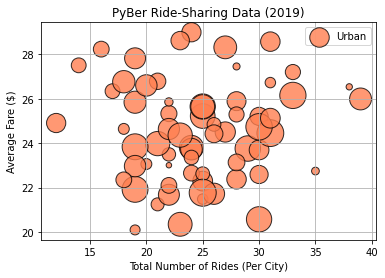

In [24]:
# Build scatter plot for urban cities
plt.scatter(urban_ride_count, 
            urban_avg_fare,
            s=10 * urban_driver_count,
            c='coral',
            edgecolors='black',
            linewidths=1,
            alpha=0.8,
            label='Urban')
plt.title('PyBer Ride-Sharing Data (2019)')
plt.ylabel('Average Fare ($)')
plt.xlabel('Total Number of Rides (Per City)')
plt.grid(True)
plt.legend()

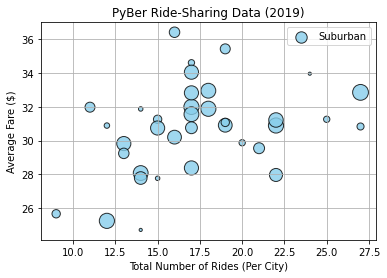

In [25]:
# Build scatter plot for suburban cities
plt.scatter(suburban_ride_count, 
            suburban_avg_fare,
            s=10 * suburban_driver_count,
            c='skyblue',
            edgecolor='black',
            linewidths=1,
            alpha=0.8,
            label='Suburban')
plt.title('PyBer Ride-Sharing Data (2019)')
plt.xlabel('Total Number of Rides (Per City)')
plt.ylabel('Average Fare ($)')
plt.grid(True)
plt.legend()

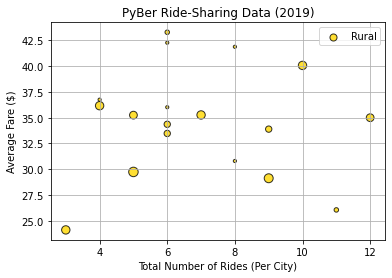

In [26]:
# Build scatter plot for rural cities
plt.scatter(rural_ride_count, 
            rural_avg_fare,
            s=10 * rural_driver_count,
            c='gold',
            edgecolors='black',
            linewidths=1,
            alpha=0.8,
            label='Rural')
plt.title('PyBer Ride-Sharing Data (2019)')
plt.xlabel('Total Number of Rides (Per City)')
plt.ylabel('Average Fare ($)')
plt.grid(True)
plt.legend()

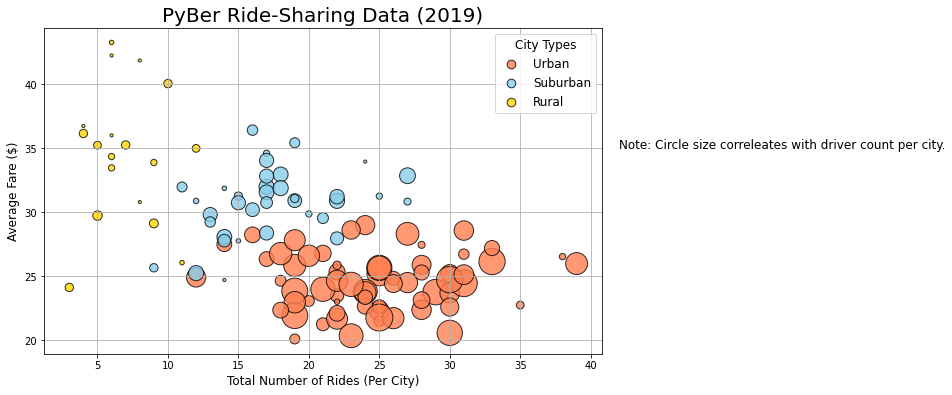

In [27]:
# Add the scatter charts for each type of city
plt.subplots(figsize=(10,6))

plt.scatter(urban_ride_count, 
            urban_avg_fare,
            s=10 * urban_driver_count,
            c='coral',
            edgecolors='black',
            linewidths=1,
            alpha=0.8,
            label='Urban')

plt.scatter(suburban_ride_count, 
            suburban_avg_fare,
            s=10 * suburban_driver_count,
            c='skyblue',
            edgecolor='black',
            linewidths=1,
            alpha=0.8,
            label='Suburban')

plt.scatter(rural_ride_count, 
            rural_avg_fare,
            s=10 * rural_driver_count,
            c='gold',
            edgecolors='black',
            linewidths=1,
            alpha=0.8,
            label='Rural')

plt.title('PyBer Ride-Sharing Data (2019)', fontsize=20)
plt.ylabel('Average Fare ($)', fontsize=12)
plt.xlabel('Total Number of Rides (Per City)', fontsize=12)
plt.grid(True)

#Create legend
lgnd = plt.legend(fontsize='12', mode='Expanded', scatterpoints=1, loc='best', title='City Types')
lgnd.legendHandles[0]._sizes = [75]
lgnd.legendHandles[1]._sizes = [75]
lgnd.legendHandles[2]._sizes = [75]
lgnd.get_title().set_fontsize(12)

# text label about circle size
plt.text(42, 35,'Note: Circle size correleates with driver count per city.', fontsize='12')

# Save the figure
plt.savefig('Resources/Analysis/Fig1.png')

# Show the plot
plt.show()

In [28]:
# Get summary statistics
urban_cities_df.describe()

,fare,ride_id,driver_count
count,1625.000000,1.625000e+03,1625.000000
mean,24.525772,4.873485e+12,36.678154
std,11.738649,2.907440e+12,20.075545
min,4.050000,1.458810e+10,3.000000
25%,14.550000,2.400244e+12,22.000000
50%,24.640000,4.711188e+12,37.000000
75%,34.580000,7.451579e+12,52.000000
max,44.970000,9.991538e+12,73.000000


In [29]:
# Get summary statistics
suburban_cities_df.describe()

,fare,ride_id,driver_count
count,625.000000,6.250000e+02,625.000000
mean,30.970128,4.971015e+12,13.712000
std,10.677508,2.912410e+12,8.042372
min,12.050000,3.218337e+08,1.000000
25%,21.970000,2.364253e+12,5.000000
50%,30.750000,5.053221e+12,16.000000
75%,39.830000,7.551674e+12,21.000000
max,49.960000,9.917744e+12,25.000000


In [30]:
# Get summary statisitics
rural_cities_df.describe()

,fare,ride_id,driver_count
count,125.000000,1.250000e+02,125.000000
mean,34.623440,4.647746e+12,4.296000
std,14.558046,2.887834e+12,2.691156
min,10.110000,2.684873e+10,1.000000
25%,19.900000,2.275364e+12,1.000000
50%,37.050000,4.023962e+12,4.000000
75%,47.070000,7.118047e+12,7.000000
max,58.550000,9.990581e+12,9.000000


In [31]:
# Get summary statistics
urban_ride_count.describe()

count    66.000000
mean     24.621212
std       5.408726
min      12.000000
25%      21.000000
50%      24.000000
75%      28.000000
max      39.000000
Name: ride_id, dtype: float64

In [32]:
# Get summary statistics
suburban_ride_count.describe()

count    36.000000
mean     17.361111
std       4.323707
min       9.000000
25%      14.000000
50%      17.000000
75%      19.250000
max      27.000000
Name: ride_id, dtype: float64

In [33]:
# Get summary statistics
rural_ride_count.describe()

count    18.000000
mean      6.944444
std       2.508157
min       3.000000
25%       5.250000
50%       6.000000
75%       8.750000
max      12.000000
Name: ride_id, dtype: float64

In [34]:
# Calculate mean of each city type
round(urban_ride_count.mean(), 2), round(suburban_ride_count.mean(), 2), round(rural_ride_count.mean(), 2)

(24.62, 17.36, 6.94)

In [35]:
# Calculate median of each city type
round(urban_ride_count.median(), 2), round(suburban_ride_count.median(), 2), round(rural_ride_count.median(), 2)

(24.0, 17.0, 6.0)

In [36]:
# Calculate mode 
urban_ride_count.mode()

0    22
1    25
dtype: int64

In [37]:
# Calculate mode
suburban_ride_count.mode()

0    17
dtype: int64

In [38]:
# Calculate mode
rural_ride_count.mode()

0    6
dtype: int64

In [42]:
# Calculate measures of central tendency for ride count
mean_urban_ride_count = np.mean(urban_ride_count)
print(f'The mean for the ride counts for urban trips is {mean_urban_ride_count}')

median_urban_ride_count = np.median(urban_ride_count)
print(f'The median for the ride counts for ubran trips is {median_urban_ride_count}')

mode_urban_ride_count = sts.mode(urban_ride_count)
print(f'The mode for the ride counts for urban trips is {mode_urban_ride_count}')

The mean for the ride counts for urban trips is 24.62121212121212
The median for the ride counts for ubran trips is 24.0
The mode for the ride counts for urban trips is ModeResult(mode=array([22], dtype=int64), count=array([7]))


In [43]:
# Calculate measures of central tendency for ride count
median_suburban_ride_count = np.median(suburban_ride_count)
print(median_suburban_ride_count)
mode_suburban_ride_count = sts.mode(suburban_ride_count)
print(mode_suburban_ride_count)

17.0
ModeResult(mode=array([17], dtype=int64), count=array([7]))


In [45]:
mode_rural_ride_count = sts.mode(rural_ride_count)
mode_rural_ride_count

ModeResult(mode=array([6], dtype=int64), count=array([5]))

In [47]:
# Get fares for urban cities
urban_fares = urban_cities_df.fare
urban_fares.head()

0    13.83
1    30.24
2    33.44
3    23.44
4    34.58
Name: fare, dtype: float64

In [49]:
# Calculate measures of central tendency for urban cities
mean_urban_fare = np.mean(urban_fares)
print(f'The mean fare price for urban trips is ${mean_urban_fare:.2f}')

median_urban_fare = np.median(urban_fares)
print(f'The median fare price for urban trips is ${median_urban_fare}')

mode_urban_fare = sts.mode(urban_fares)
print(f'Themode fare price for urban trips is ${mode_urban_fare}')

The mean fare price for urban trips is $24.53
The median fare price for urban trips is $24.64
Themode fare price for urban trips is $ModeResult(mode=array([22.86]), count=array([5]))


In [50]:
suburban_fares = suburban_cities_df.fare

In [51]:
# Calculate measures of central tendency for suburban cities
mean_suburban_fare = np.mean(suburban_fares)
print(f'The mean fare price for suburban trips is ${mean_suburban_fare:.2f}')

median_suburban_fare = np.median(suburban_fares)
print(f'The median fare price for suburban trips is ${median_suburban_fare:.2f}')

mode_suburban_fare = sts.mode(suburban_fares)
print(f'The mode fare price for suburban trips is ${mode_suburban_fare}')

The mean fare price for suburban trips is $30.97
The median fare price for suburban trips is $30.75
The mode fare price for suburban trips is $ModeResult(mode=array([17.99]), count=array([3]))


In [52]:
rural_fares = rural_cities_df.fare

In [53]:
# Calculate measures of central tendency for rural cities
mean_rural_fare = np.mean(rural_fares)
print(f'The mean fare price for rural trips is ${mean_rural_fare:.2f}')

median_rural_fare = np.median(rural_fares)
print(f'The median fare price for rural trips is ${median_rural_fare:.2f}')

mode_rural_fare = sts.mode(rural_fares)
print(f'The mode fare price for rural trips is ${mode_rural_fare}')

The mean fare price for rural trips is $34.62
The median fare price for rural trips is $37.05
The mode fare price for rural trips is $ModeResult(mode=array([37.05]), count=array([2]))


In [54]:
# Get driver count for urban cities
urban_drivers = urban_cities_df.driver_count
urban_drivers.head()

0     5
1    72
2    57
3    34
4    46
Name: driver_count, dtype: int64

In [57]:
# Calculate the measures of central tendencies for urban cities
mean_urban_drivers = np.mean(urban_drivers)
print(f'The mean driver count for urban trips is {mean_urban_drivers:.2f}')

median_urban_drivers = np.median(urban_drivers)
print(f'The median driver count for urban trips is {median_urban_drivers}')
      
mode_urban_drivers = sts.mode(urban_drivers)
print(f'The mode driver count for urban trips is {mode_urban_drivers}')

The mean driver count for urban trips is 36.68
The median driver count for urban trips is 37.0
The mode driver count for urban trips is ModeResult(mode=array([39], dtype=int64), count=array([86]))


In [58]:
# Get driver count for suburban cities
suburban_drivers = suburban_cities_df.driver_count

In [61]:
# Calculate the measures for central tendency for suburban cities
mean_suburban_driver = np.mean(suburban_drivers)
print(f'The mean driver count for suburban trips is {mean_suburban_driver:.2f}')

median_suburban_driver = np.median(suburban_drivers)
print(f'The median driver count for suburban trips is {median_suburban_driver:.2f}')

mode_suburban_driver = sts.mode(suburban_drivers)
print(f'The mode driver count for suburban trips is {mode_urban_drivers}')

The mean driver count for suburban trips is 13.71
The median driver count for suburban trips is 16.00
The mode driver count for suburban trips is ModeResult(mode=array([39], dtype=int64), count=array([86]))


In [62]:
# Get driver count for rural cities
rural_drivers = rural_cities_df.driver_count

In [63]:
# Calculate the measures of central tendency for rural cities
mean_rural_drivers = np.mean(rural_drivers)
print(f'The mean driver count for rural trips is {mean_rural_drivers:.2f}')

median_rural_drivers = np.median(rural_drivers)
print(f'The median driver count for rural trips is {median_rural_drivers:.2f}')

mode_rural_drivers = sts.mode(rural_drivers)
print(f'The mode driver count for rural trips is {mode_rural_drivers}')

The mean driver count for rural trips is 4.30
The median driver count for rural trips is 4.00
The mode driver count for rural trips is ModeResult(mode=array([1], dtype=int64), count=array([32]))


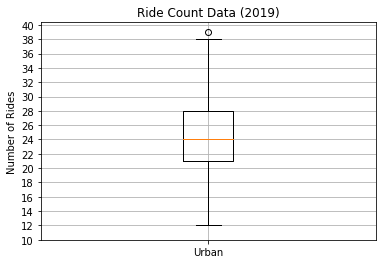

In [64]:
# Create boxplot for urban cities ride count
x_labels = ['Urban']
fig, ax = plt.subplots()
ax.boxplot(urban_ride_count, labels=x_labels)
ax.set_title('Ride Count Data (2019)')
ax.set_ylabel('Number of Rides')
ax.set_yticks(np.arange(10, 41, step=2.0))
ax.grid()
plt.show()

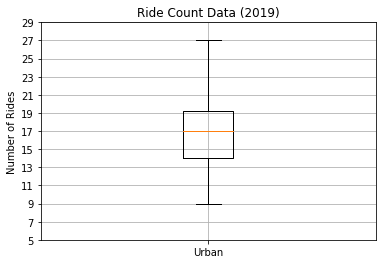

In [67]:
# Create boxplot for ride counts for suburban cities
x_label = ['Suburban']
fig, ax = plt.subplots()
ax.boxplot(suburban_ride_count, labels=x_labels)
ax.set_title('Ride Count Data (2019)')
ax.set_ylabel('Number of Rides')
ax.set_yticks(np.arange(5, 30, step=2.0))
ax.grid()
plt.show()

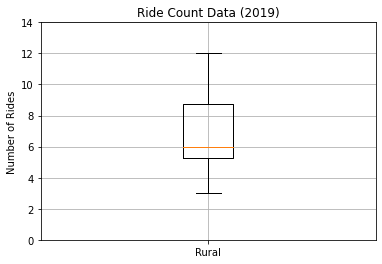

In [70]:
# Create boxplot for ride counts for rural cities
x_label = ['Rural']
fig, ax = plt.subplots()
ax.boxplot(rural_ride_count, labels=x_label)
ax.set_title('Ride Count Data (2019)')
ax.set_ylabel('Number of Rides')
ax.set_yticks(np.arange(0, 15, step=2.0))
ax.grid()
plt.show()

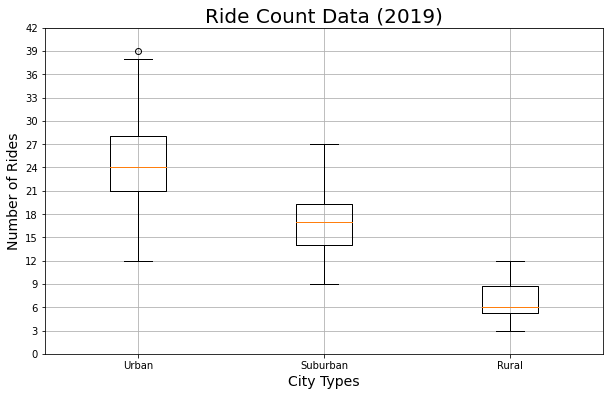

In [79]:
# Add all ride count boxplot together
x_labels = ['Urban', 'Suburban', 'Rural']
ride_count_data = [urban_ride_count, suburban_ride_count, rural_ride_count]
fig, ax = plt.subplots(figsize=(10, 6))
ax.boxplot(ride_count_data, labels=x_labels)
ax.set_title('Ride Count Data (2019)', fontsize=20)
ax.set_ylabel('Number of Rides', fontsize=14)
ax.set_xlabel('City Types', fontsize=14)
ax.set_yticks(np.arange(0, 45, step=3.0))
ax.grid()
plt.savefig('Resources/Analysis/Fig2.png')
plt.show()

In [74]:
# Get the city that mates 39
urban_city_outlier = urban_ride_count[urban_ride_count==39].index[0]
print(f'{urban_city_outlier} has the highest rider count')

West Angela has the highest rider count


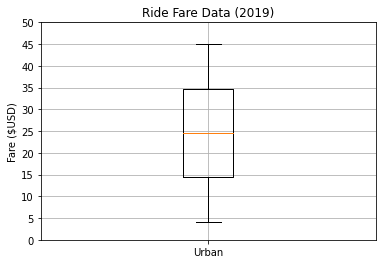

Summary Statistics


count    1625.000000
mean       24.525772
std        11.738649
min         4.050000
25%        14.550000
50%        24.640000
75%        34.580000
max        44.970000
Name: fare, dtype: float64

In [76]:
# Create a boxplot for urban fare
x_labels = ['Urban']
fig, ax = plt.subplots()
ax.boxplot(urban_fares, labels=x_labels)
ax.set_title('Ride Fare Data (2019)')
ax.set_ylabel('Fare ($USD)')
ax.set_yticks(np.arange(0, 51, step=5.0))
ax.grid()
plt.show()
print('Summary Statistics')
urban_fares.describe()

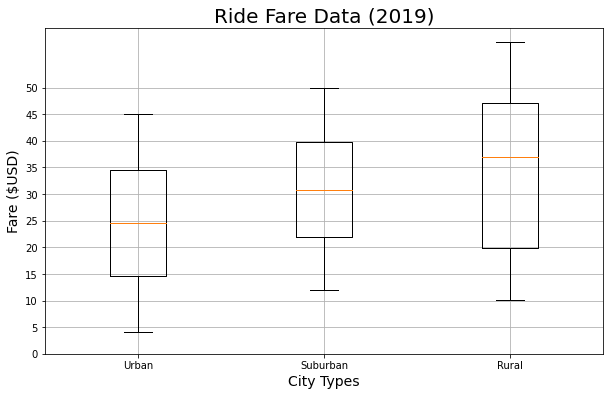

In [78]:
# Create boxplot for fare for all cities
x_label = ['Urban', 'Suburban', 'Rural']
fare_data = [urban_fares, suburban_fares, rural_fares]
fig, ax = plt.subplots(figsize=(10, 6))
ax.boxplot(fare_data, labels=x_label)
ax.set_title('Ride Fare Data (2019)', fontsize=20)
ax.set_ylabel('Fare ($USD)', fontsize=14)
ax.set_xlabel('City Types', fontsize=14)
ax.set_yticks(np.arange(0, 55, step=5.0))
ax.grid()
plt.savefig('Resources/Analysis/Fig3.png')
plt.show()

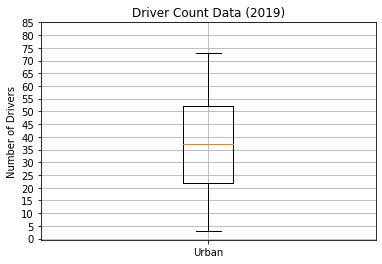

Summary Statistics


count    1625.000000
mean       36.678154
std        20.075545
min         3.000000
25%        22.000000
50%        37.000000
75%        52.000000
max        73.000000
Name: driver_count, dtype: float64

In [80]:
# Create boxplot for urban driver count 
x_labels = ['Urban']
fig, ax = plt.subplots()
ax.boxplot(urban_drivers, labels=x_labels)
ax.set_title('Driver Count Data (2019)')
ax.set_ylabel('Number of Drivers')
ax.set_yticks(np.arange(0, 90, step=5.0))
ax.grid()
plt.show()
print('Summary Statistics')
urban_drivers.describe()

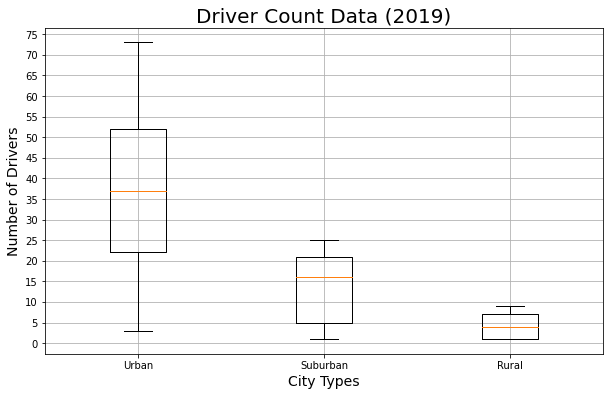

In [82]:
# Create boxplot for driver count for all city types
x_labels = ['Urban', 'Suburban', 'Rural']
driver_data = [urban_drivers, suburban_drivers, rural_drivers]
fig, ax = plt.subplots(figsize=(10, 6))
ax.boxplot(driver_data, labels=x_labels)
ax.set_title('Driver Count Data (2019)', fontsize=20)
ax.set_ylabel('Number of Drivers', fontsize=14)
ax.set_xlabel('City Types', fontsize=14)
ax.set_yticks(np.arange(0, 76, step=5.0))
ax.grid()
plt.savefig('Resources/Analysis/Fig4.png')
plt.show()

In [84]:
# Get sum of fares for each city type
sum_fares_by_type = pyber_data_df.groupby(['type']).sum()['fare']
sum_fares_by_type

type
Rural        4327.93
Suburban    19356.33
Urban       39854.38
Name: fare, dtype: float64

In [85]:
# Get the sum of all fares
total_fares = pyber_data_df.fare.sum()
total_fares

63538.64

In [86]:
# Calculate the percentage of fare for each city type
type_percents = sum_fares_by_type / total_fares * 100
type_percents

type
Rural        6.811493
Suburban    30.463872
Urban       62.724635
Name: fare, dtype: float64

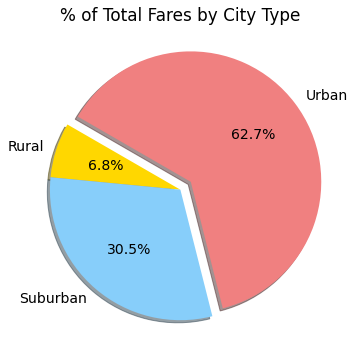

In [92]:
# Build pie chart of percentage of fares by city type
plt.subplots(figsize=(10,6))
plt.pie(type_percents, 
        labels=['Rural', 'Suburban', 'Urban'],
        colors=['gold', 'lightskyblue', 'lightcoral'],
        explode=[0, 0, 0.1],
        autopct='%1.1f%%',
        shadow=True,
        startangle=150)
plt.title('% of Total Fares by City Type')
mpl.rcParams['font.size'] = 14
plt.savefig('Resources/Analysis/Fig5.png')
plt.show()